# Plot Couhette


In [1]:
# written by Mira Schmitt (IOW) and Lars Umlauf (IOW)
# questions to gotm-users@googlegroups.com

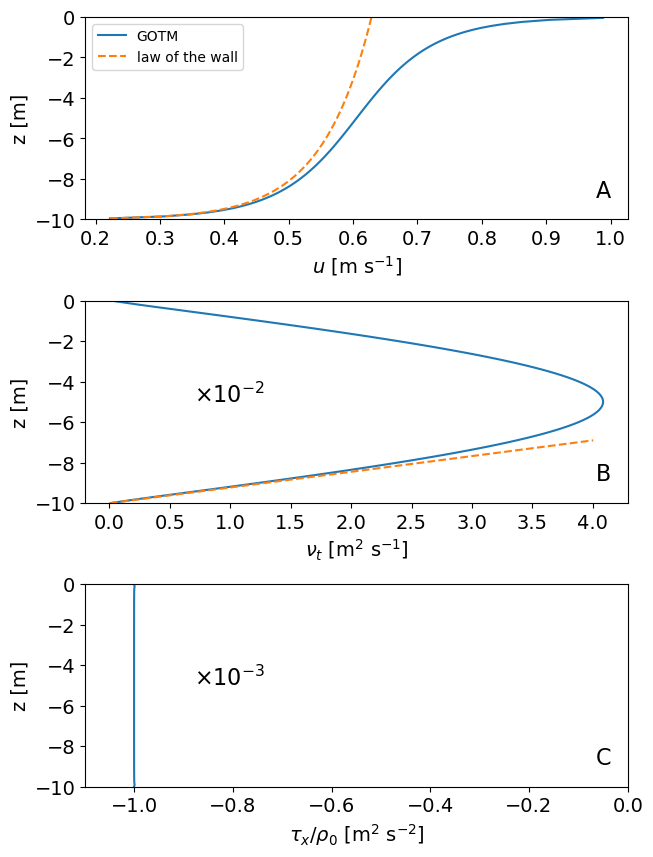

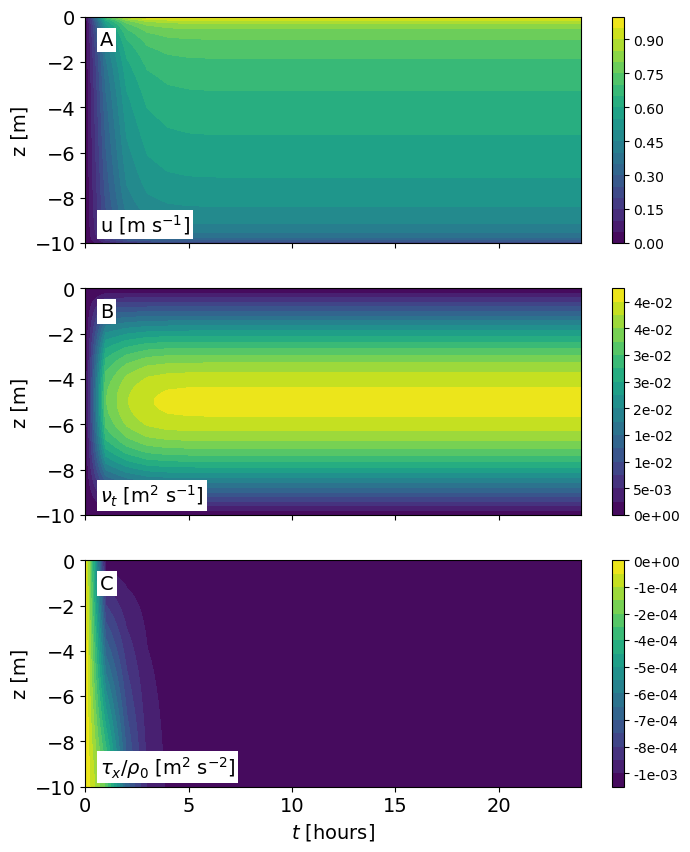

In [2]:
# load required packages
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# model parameters
h0b     = 0.1             # bottom roughness (has to be consistent with gotm.yaml)
kappa   = 0.408           # von Karman constant (has to be consistent with turbulence model)

file    = 'couette.nc'
couette = nc.Dataset(file)

# load variables from netCDF
z       = couette.variables['z'][:, :, 0, 0]
zi      = couette.variables['zi'][:, :, 0, 0]
t       = couette.variables['time'][:]
u       = couette.variables['u'][:, :, 0, 0]
num     = couette.variables['num'][:, :, 0, 0]
taux    = couette.variables['taux'][:, :, 0, 0]
u_taub  = couette.variables['u_taub'][:, 0, 0] 

# plot all following profiles at this time index
NT      = t.size
iPlt    = NT-1

# water depth
H       = - zi[iPlt,0]

# law of the wall relations
z0      = 0.03*h0b              # bottom roughness length
z_low   = z[iPlt,:]  + H        # axis starting at the bottom
zi_low  = zi[iPlt,:] + H
u_low   = u_taub[iPlt] / kappa * np.log( ( z_low + z0) / z0)
num_low = u_taub[iPlt] * kappa * (zi_low + z0)

# cut low quantities at maximum of corresponding GOTM variables (for plotting)
u_low[np.where(u_low > np.max(u[iPlt,:]))] = np.nan
num_low[np.where(num_low > np.max(num[iPlt,:]))] = np.nan


# plot vertical profiles at time index iPlt
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(7, 10))
plt.subplots_adjust(hspace=0.4)

bprops = {'facecolor': 'white','edgecolor': 'none', 'pad': 2}     # text label box properties

ax1.plot(u[iPlt, :], z[iPlt, :], label='GOTM')
ax1.plot(u_low, z[iPlt, :], '--', label='law of the wall')
ax1.set_xlabel('$u$ [m s$^{-1}$]',fontsize=14)
ax1.set_ylabel('z [m]',fontsize=14)
ax1.set_ylim([-H, 0])
ax1.legend(loc='upper left')
ax1.text(0.97, 0.2, 'A',verticalalignment='top',horizontalalignment='right',
         transform=ax1.transAxes,fontsize=16,bbox=bprops)
ax1.tick_params(labelsize=14)

ax2.plot(100*num[iPlt, :], zi[iPlt, :])
ax2.plot(100*num_low, zi[iPlt, :], '--')
ax2.set_xlabel(r'$\nu_t$ [m$^2$ s$^{-1}$]',fontsize=14)
ax2.set_ylabel('z [m]',fontsize=14)
ax2.set_ylim([-H, 0])
ax2.text(0.97, 0.2, 'B',verticalalignment='top',horizontalalignment='right',
         transform=ax2.transAxes,fontsize=16,bbox=bprops)
ax2.text(0.2, 0.6, r'$\times 10^{-2}$',verticalalignment='top',horizontalalignment='left',
         transform=ax2.transAxes,fontsize=16,bbox=bprops)
ax2.tick_params(labelsize=14)


ax3.plot(1000*taux[iPlt, :], zi[iPlt, :])
ax3.set_xlabel(r'$\tau_x/\rho_0$ [m$^2$ s$^{-2}$]',fontsize=14)
ax3.set_ylabel('z [m]',fontsize=14)
ax3.set_xlim([1.1*np.max(1000*taux[iPlt, :]),0])
ax3.set_ylim([-H, 0])
ax3.text(0.97, 0.2, 'C',verticalalignment='top',horizontalalignment='right',
         transform=ax3.transAxes,fontsize=16,bbox=bprops)
ax3.text(0.2, 0.6, r'$\times 10^{-3}$',verticalalignment='top',horizontalalignment='left',
         transform=ax3.transAxes,fontsize=16,bbox=bprops)
ax3.tick_params(labelsize=14)

plt.savefig('couette.png')
plt.show()


# do contour plot of entire time series
fig2, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 10))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change
z1D   = z[0, :]
zi1D  = zi[0, :]

hour  = 3600

levels = MaxNLocator(nbins=20).tick_values(u.min(), u.max())
CS1 = ax1.contourf(t/hour, z1D,  u.T, levels=levels)
ax1.text(0.03, 0.94, 'A',verticalalignment='top',horizontalalignment='left',
         transform=ax1.transAxes,fontsize=14,bbox=bprops)
ax1.text(0.03, 0.03,'u [m s$^{-1}$]',verticalalignment='bottom',horizontalalignment='left',
         backgroundcolor='w',transform=ax1.transAxes,fontsize=14,bbox=bprops)
ax1.set_ylabel('z [m]',fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig2.colorbar(CS1, ax=ax1)

levels = MaxNLocator(nbins=20).tick_values(num.min(), num.max())
CS2 = ax2.contourf(t/hour, zi1D, num.T, levels=levels)
ax2.text(0.03, 0.94,'B',verticalalignment='top',horizontalalignment='left',
         backgroundcolor='w',transform=ax2.transAxes,fontsize=14,bbox=bprops)
ax2.text(0.03, 0.03,r'$\nu_t$ [m$^2$ s$^{-1}$]',verticalalignment='bottom',horizontalalignment='left',
         backgroundcolor='w',transform=ax2.transAxes,fontsize=14,bbox=bprops)
ax2.set_ylabel('z [m]',fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig2.colorbar(CS2, ax=ax2, format='%.0e')

levels = MaxNLocator(nbins=20).tick_values(taux.min(), taux.max())
CS3 = ax3.contourf(t/hour, zi1D, taux.T, levels=levels)
ax3.text(0.03, 0.94, 'C',verticalalignment='top',horizontalalignment='left',
         backgroundcolor='w',transform=ax3.transAxes,fontsize=14,bbox=bprops)
ax3.text(0.03, 0.03,r'$\tau_x/\rho_0$ [m$^2$ s$^{-2}$]',verticalalignment='bottom',horizontalalignment='left',
         backgroundcolor='w',transform=ax3.transAxes,fontsize=14,bbox=bprops)
ax3.set_xlabel('$t$ [hours]',fontsize=14)
ax3.set_ylabel('z [m]',fontsize=14)
ax3.set_ylim([-H, 0])
ax3.tick_params(labelsize=14)
colorbar3 = fig2.colorbar(CS3, ax=ax3, format='%.0e')


plt.savefig('couette2.png')
plt.show()
